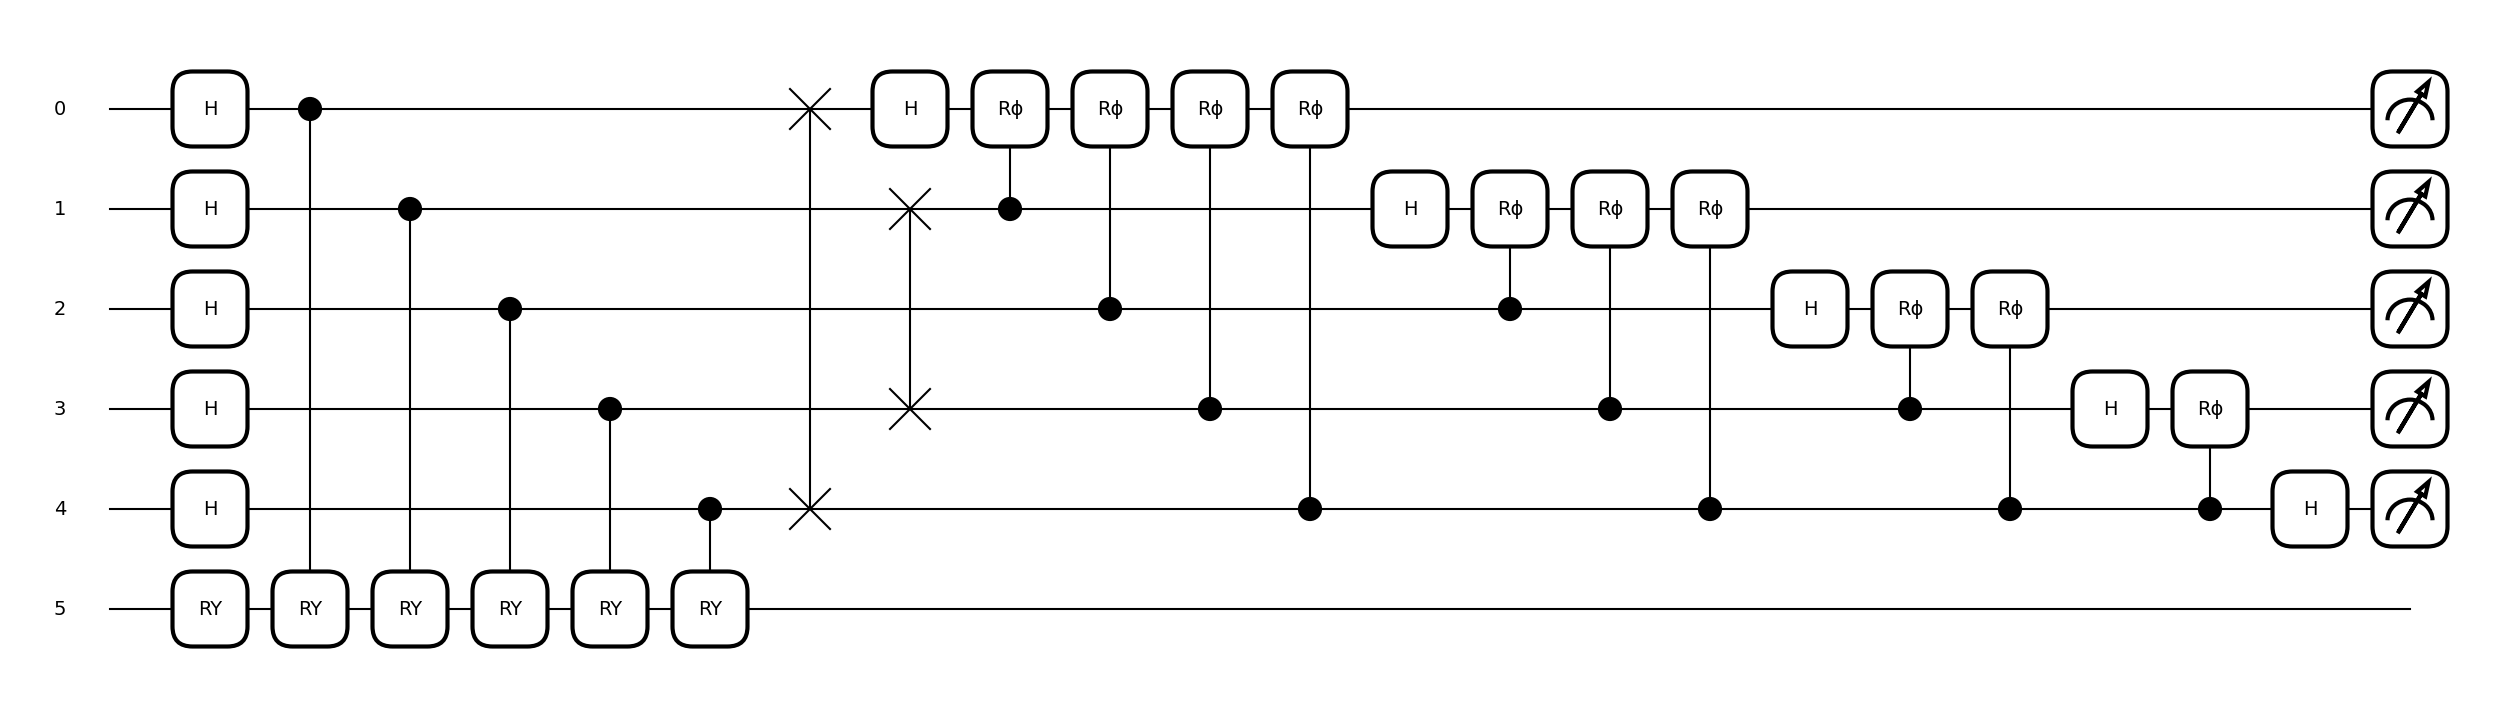


Probability distribution over ancilla measurement outcomes:
[3.36091103e-04 1.14915989e-06 1.97600249e-01 1.97600249e-01
 1.77951409e-01 3.17143563e-02 3.17143563e-02 1.77951409e-01
 9.03303689e-03 1.74203557e-04 2.31448556e-02 4.04785177e-02
 4.04785177e-02 2.31448556e-02 1.74203557e-04 9.03303689e-03
 4.13355821e-04 1.08730923e-06 6.51868237e-03 7.73358282e-03
 2.71376978e-03 7.81577983e-04 1.43907329e-04 1.42878808e-03
 1.42878808e-03 1.43907329e-04 7.81577983e-04 2.71376978e-03
 7.73358282e-03 6.51868237e-03 1.08730923e-06 4.13355821e-04]
True phase φ = θ/π = 0.0637
Estimated phase φ ≈ 0.0625
Estimated θ ≈ 0.19634954084936207


In [6]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

def qft_inv(wires):
    n = len(wires)
    for i in range(n // 2):
        qml.SWAP(wires=[wires[i], wires[n - i - 1]])
    for j in range(n):
        qml.Hadamard(wires=wires[j])
        for k in range(j + 1, n):
            qml.ControlledPhaseShift(-np.pi / (2 ** (k - j)), wires=[wires[k], wires[j]])

def phase_estimation_circuit(theta, n_ancillas=3):
    wires = list(range(n_ancillas + 1))
    ancilla_wires = wires[:-1]
    work_wire = wires[-1]

    for w in ancilla_wires:
        qml.Hadamard(wires=w)
    
    qml.RY(-2 * theta, wires=work_wire)
    
    for j, control in enumerate(ancilla_wires):
        exponent = 2 ** (n_ancillas - 1 - j)
        angle = 4 * theta * exponent
        qml.ctrl(qml.RY, control=control)(angle, wires=work_wire)
    
    qft_inv(ancilla_wires)
    
    return qml.probs(wires=ancilla_wires)


n_ancillas = 5
dev = qml.device("default.qubit", wires=n_ancillas + 1)

@qml.qnode(dev)
def phase_estimation_qnode(theta):
    return phase_estimation_circuit(theta, n_ancillas)

theta_val = 0.2

qml.draw_mpl(phase_estimation_qnode)(theta_val)
plt.show()

# Run the circuit and get the probability distribution.
probs = phase_estimation_qnode(theta_val)
print("\nProbability distribution over ancilla measurement outcomes:")
print(probs)

# Get estimated phase from the most probable measurement outcome
estimated_idx = np.argmax(probs)
estimated_binary = format(estimated_idx, f'0{n_ancillas}b')
estimated_phi = int(estimated_binary, 2) / (2 ** n_ancillas)
estimated_theta = np.pi * estimated_phi

true_phase = theta_val / np.pi
print(f"True phase φ = θ/π = {true_phase:.4f}")
print(f"Estimated phase φ ≈ {estimated_phi}")
print(f"Estimated θ ≈ {estimated_theta}")


In [7]:
N = 32
estimated_t = N * np.sin(np.pi * estimated_phi)**2
print(f"\nEstimated t ≈ {estimated_t:.2f}")


Estimated t ≈ 1.22
